<h1>Entrega 2 - Di Pasquale -  Salvatore </h1>

<ol type="2.1">
    <li>Encuentre la Serie Encuentre la Serie trigonométrica de Fourier y grafique el espectro de Fourier (Módulo y
Fase) de la siguiente señal x(t):</li>
</ol>

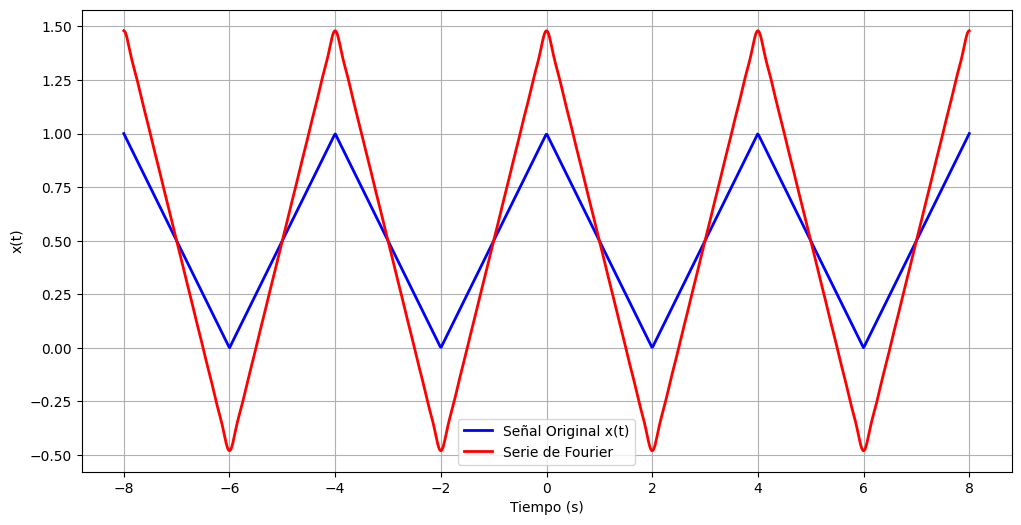

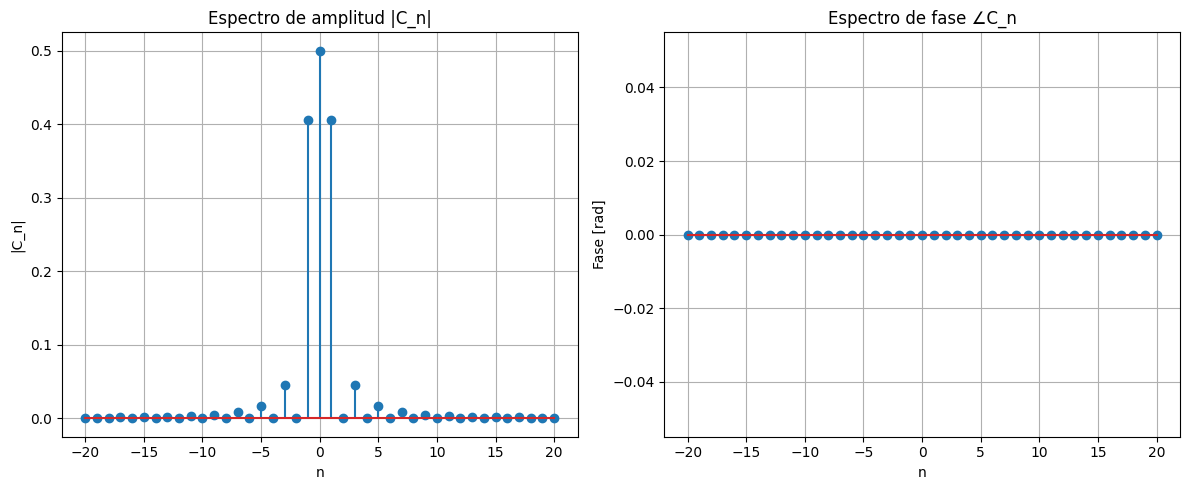

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros de la señal
A = 1. #Amplitud
T = 4  # periodo 
w0 = 2*np.pi/T #frecuencia angular fundamental
N = 20 #Cantidad de armonicos

#Definicion de la señal triangular x(t) en periodo [-T/2, T/2]
def x(t):
    t_mod = np.mod(t+T/2, T) - T/2 #reduzco t al intervalo [-T/2, T/2]
    return (2*A/T)*(T/2 - np.abs(t_mod)) # triangulo de base T y altura A

# Calculo de Fourier
# coeficientes Ck
def a_n(n):
    if n == 0:
        return A
    else:
        return (4*A/(n**2 * np.pi**2)) * (1 - (-1)**n)
    
def b_n(n):
    #La señal es par, no tiene senos
    return 0

#Recontrucccion N armonicos
def fourier_series(t, N):
    suma = a_n(0)/2 * np.ones_like(t) # termino cte
    for n in range(1, N+1):
        suma += a_n(n)*np.cos(n*w0*t) +b_n(n)*np.sin(n*w0*t)
    return suma

#Graficar la señal original y la aproximacion
t = np.linspace(-2*T, 2*T, 1000)
x_t = x(t)
x_aprox = fourier_series(t, N)

plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label="Señal Original x(t)", color='blue', linewidth=2)
plt.plot(t, x_aprox, label="Serie de Fourier", color='red', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

#Espectro de amplitud y fase
n = np.arange(-N, N+1)
Cn = np.zeros_like(n, dtype=complex)
for k, m in enumerate(n):
    if m == 0:
        Cn[k] = 0.5*a_n(0)
    else:
        # b_n = 0; a_|m| según fórmula; C_{±m} = a_m/2 (real)
        Cn[k] = 0.5*a_n(abs(m))


fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Módulo
markerline, stemlines, baseline = axs[0].stem(n, np.abs(Cn))
axs[0].set_title('Espectro de amplitud |C_n|'); axs[0].grid(True)
axs[0].set_xlabel('n'); axs[0].set_ylabel('|C_n|')

# Fase
markerline2, stemlines2, baseline2 = axs[1].stem(n, np.angle(Cn))
axs[1].set_title('Espectro de fase ∠C_n'); axs[1].grid(True)
axs[1].set_xlabel('n'); axs[1].set_ylabel('Fase [rad]')

plt.tight_layout()
plt.show()